## Advanced NBA Statistics Capstone

# 3. EDA: Analyzing Outliers, Pruning Colinear Variables, & Clustering

In this notebook we will:
   - Analyze and filter outliers based on upon players that have exogenous factors contibuting to their statistics.
   - Prune colinnear variables that contain redundant information that are captured by another feature.
   - Use a K-Means Clustering algorithm to group players into five clusters as a stand-in feature for player position.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/clean_nba_stats_data.csv')


In [3]:
df.head()

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,MIN_2018,GP,W,L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,Box_Outs,OFF_Box_Outs,DEF_Box_Outs,Team_RebOn_Box_Outs,Player_RebOn_Box_Outs,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,PotentialAST,AST_PTS_Created,ASTAdj,AST_ToPass%,AST_ToPass%_Adj,ScreenAssists,ScreenAssists_PTS,Deflections,OFF_Loose_BallsRecovered,DEF_Loose_BallsRecovered,Loose_BallsRecovered,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,ContestedShots,FGM_und_5ft,FGA_und_5ft,FG%_und_5ft,FGM_5_9ft,FGA_5_9ft,FG%_5_9ft,FGM_10_14ft,FGA_10_14ft,FG%_10_14ft,FGM_15_19ft,FGA_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FGA_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FGA_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FGA_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FGA_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FGA_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FGA_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,REB%,eFG%,TS%,USG%,PACE
0,Aaron Gordon,ORL,Arizona,USA,11.3,10.9,22,32.9,33.8,58,19,39,17.6,6.5,14.9,43.4,2.0,5.9,33.6,2.7,3.9,69.8,1.5,6.4,7.9,2.3,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,81.0,220,4,2.7,0.2,2.5,1.3,0.4,7.0,93.0,85.2,23.9,2.6,33.5,13.6,58.1,0.7,61.1,6.0,40.2,32.5,0.2,4.6,5.6,2.7,5.8,6.6,0.9,1.9,1.4,0.5,0.7,1.2,42.9,57.1,0.07,4.7,1.8,6.5,3.2,4.9,66.7,0.2,0.9,20.0,0.4,1.2,35.7,0.5,1.8,29.8,14.4,22.8,63.2,2.3,6.1,37.1,2.2,5.1,42.4,2.5,5.9,42.4,3.7,9.3,40.3,3.8,11.1,33.9,108.3,-2.0,11.1,4.4,19.1,11.6,50.0,53.0,23.8,100.43
1,Abdel Nader,BOS,Iowa State,Egypt,3.3,6.6,24,10.9,11.4,48,33,15,3.0,1.0,3.1,33.6,0.5,1.4,35.4,0.5,0.8,59.0,0.3,1.2,1.5,0.5,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,78.0,230,58,0.8,0.1,0.7,0.5,0.1,17.5,82.5,92.0,12.0,0.4,29.6,2.6,57.7,0.2,62.3,7.0,8.7,9.1,0.1,1.3,1.5,0.7,6.4,8.6,0.1,0.3,0.7,0.1,0.2,0.4,38.9,61.1,0.00,1.5,1.3,2.8,0.4,1.1,40.4,0.1,0.5,20.0,0.0,0.1,20.0,0.0,0.1,0.0,4.2,7.1,59.8,0.5,1.9,26.8,0.6,1.5,41.9,0.8,1.9,42.2,1.3,3.0,43.1,1.7,4.2,39.8,107.3,-10.3,7.8,2.4,11.1,6.7,41.3,43.9,16.2,100.46
2,Al Horford,BOS,Florida,Dominican Rep...,13.4,13.4,32,31.6,29.0,72,47,25,12.9,5.1,10.5,48.9,1.3,3.1,42.9,1.3,1.7,78.3,1.4,5.9,7.4,4.7,1.8,0.6,1.1,1.9,32.0,15,0,4.8,82.0,245,3,6.8,0.5,6.3,3.5,1.3,7.3,92.7,90.4,33.3,2.5,33.9,12.7,57.8,0.6,60.6,6.4,48.9,42.9,0.3,8.0,11.7,5.1,9.5,10.4,2.7,6.5,1.3,0.4,0.4,0.8,52.6,47.4,0.00,8.8,3.5,12.3,1.9,2.9,67.5,0.8,1.9,40.7,0.5,1.4,37.3,0.4,0.9,49.2,11.5,19.2,59.8,1.8,5.4,33.9,1.8,4.9,36.0,2.4,6.6,35.7,3.4,8.3,41.2,3.5,11.8,29.8,101.6,7.3,22.5,4.7,17.8,11.5,55.3,57.5,18.3,97.23
3,Al-Farouq Aminu,POR,Wake Forest,USA,9.0,9.7,27,30.0,28.3,69,40,29,9.3,3.3,8.4,39.5,1.8,4.9,36.9,0.9,1.2,73.8,1.4,6.2,7.6,1.2,1.1,1.1,0.6,2.0,24.3,9,0,3.2,81.0,220,8,3.9,0.6,3.3,1.9,0.9,16.2,83.8,88.5,40.5,2.2,29.1,12.9,59.2,0.7,62.4,5.9,25.0,19.1,0.2,2.6,3.1,1.6,4.9,6.3,1.5,3.5,2.2,0.5,0.7,1.2,42.4,57.6,0.00,5.7,3.0,8.7,1.2,2.1,58.9,0.2,0.7,24.5,0.0,0.2,16.7,0.0,0.4,11.1,10.3,19.0,54.1,2.3,5.3,43.3,2.1,5.3,38.5,2.6,5.9,43.6,3.5,9.0,39.5,3.4,9.1,36.8,104.4,5.2,5.6,4.5,19.8,12.1,50.3,52.2,14.5,98.47
4,Alan Williams,PHX,California-Santa Barbara,USA,8.9,27.4,25,14.1,5.1,5,1,4,4.0,1.4,3.6,38.9,0.0,0.0,0.0,1.2,1.8,66.7,0.6,3.8,4.4,1.6,1.4,1.0,0.2,2.6,13.9,0,0,0.2,80.0,265,61,3.4,0.4,3.0,1.4,0.6,11.8,88.2,87.5,37.5,1.2,27.3,9.6,45.8,0.0,45.8,4.0,17.6,15.6,0.0,3.0,5.6,2.0,9.1,11.4,1.8,4.0,1.0,0.0,0.2,0.2,0.0,100.0,0.00,1.2,1.0,2.2,0.8,1.4,57.1,0.6,1.6,37.5,0.0,0.6,0.0,0.0,0.0,0.0,4.2,9.4,44.7,1.0,2.2,45.5,0.8,1.6,50.0,0.8,2.2,36.4,1.2,2.2,54.5,1.4,5.2,26.9,90.8,0.1,19.5,3.9,26.0,14.8,38.9,45.5,18.4,97.25


In [4]:
# Dropping MIN_2018 as we are not using this as our response variable in this iteration.

df.drop(columns="MIN_2018", inplace=True)

In [5]:
df.shape

(412, 112)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Columns: 112 entries, Player to PACE
dtypes: float64(100), int64(8), object(4)
memory usage: 360.6+ KB


In [7]:
df.isnull().sum().sum()

0

### EDA on subset of column features

In [8]:
df.College.value_counts().head(20)

None                   71
Kentucky               23
Duke                   16
North Carolina         13
UCLA                   13
Arizona                11
Kansas                 10
Texas                   9
Florida                 8
Indiana                 8
Michigan                7
Syracuse                7
Connecticut             6
Wake Forest             6
Washington              6
Louisville              5
Texas A&M               5
Baylor                  5
Marquette               5
Southern California     5
Name: College, dtype: int64

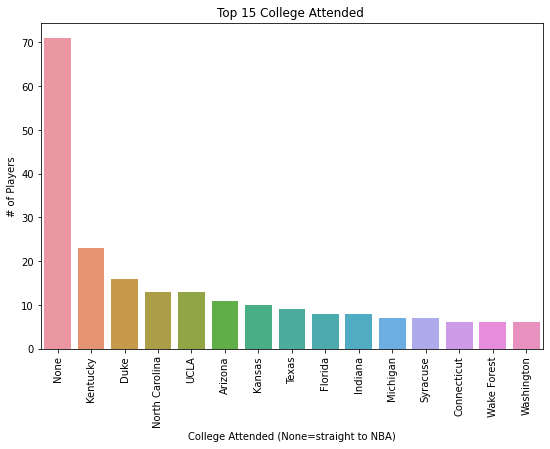

In [9]:
plt.figure(figsize=(9,6))
sns.barplot(x=df.College.value_counts().iloc[:15].index, y=df.College.value_counts().iloc[:15])
plt.xticks(rotation=90)
plt.title('Top 15 College Attended ')
plt.xlabel('College Attended (None=straight to NBA)')
plt.ylabel('# of Players')
plt.show()
# plt.savefig('college_bar_chart.png')

In [10]:
df.Country.value_counts().head(15)

USA                 316
Canada               11
Australia             8
France                8
Spain                 7
Croatia               6
Serbia                5
Brazil                4
Germany               4
Turkey                4
Cameroon              3
Italy                 2
United Kingdo...      2
DRC                   2
Switzerland           2
Name: Country, dtype: int64

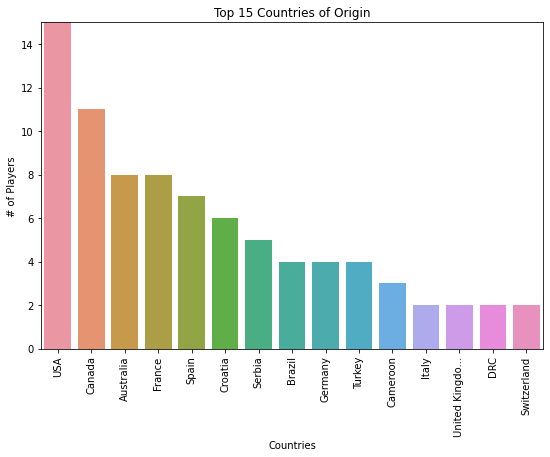

In [11]:
plt.figure(figsize=(9,6))


sns.barplot(x=df.Country.value_counts().iloc[:15].index, y=df.Country.value_counts().iloc[:15])


plt.xticks(rotation=90)
plt.title('Top 15 Countries of Origin')
plt.xlabel('Countries')
plt.ylabel('# of Players')
plt.ylim((0,15))
plt.show()
# plt.savefig('countries_bar_chart.png')

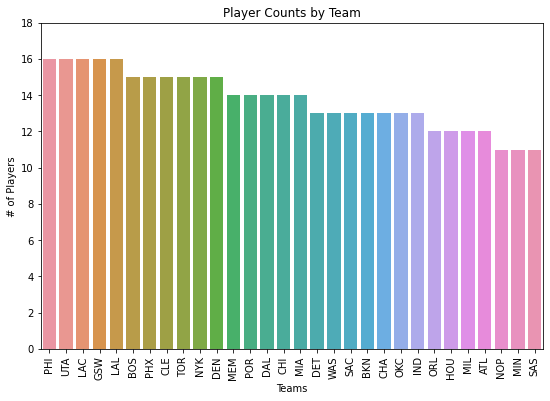

In [12]:
plt.figure(figsize=(9,6))


sns.barplot(x=df.TEAM.value_counts().index, y=df.TEAM.value_counts())

plt.xticks(rotation=90)
plt.title('Player Counts by Team')
plt.xlabel('Teams')
plt.ylabel('# of Players')
plt.ylim((0,18))

"""
Note: Some teams here are shown to have less players. A main factor of this is that in this model
I filtered out players that retired, so teams with less players here are perhaps teams that had 
more players leave the league. Additionally, these teams might have just had less players on the roster.
"""
plt.show()
# plt.savefig('countries_bar_chart.png')

In [13]:
# Looking at a subset of the first thirty columns to render interpretable data visualizations.

df_30_cols = df.iloc[:,4:34]
#df_30_cols.head()

In [14]:
# Correlation Matrix

df_30_cols.corr()

,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height
PIE_2017,1.000000,0.381681,0.078691,0.309466,0.158400,0.174268,0.076810,0.493182,0.504441,0.417916,0.620919,0.172476,0.124917,0.159081,0.480854,0.494454,0.003459,0.362910,0.496295,0.484382,0.361425,0.405408,0.280351,0.341562,0.206879,0.543219,0.470709,0.235351,0.310070,0.092033
PIE_2018,0.381681,1.000000,-0.000709,0.246082,0.117308,0.180367,0.000877,0.419679,0.436021,0.366911,0.183115,-0.000321,0.016599,-0.168534,0.477237,0.501220,-0.004961,0.404361,0.507528,0.506555,0.281075,0.396176,0.199900,0.403350,0.243882,0.486011,0.496781,0.230573,0.183662,0.243414
AGE,0.078691,-0.000709,1.000000,0.203913,0.193401,0.255379,0.047274,0.147862,0.131258,0.125604,0.051998,0.217529,0.193940,0.070925,0.106194,0.079246,0.189570,0.018906,0.116083,0.094108,0.150667,0.094703,0.090002,0.048484,0.081636,0.156316,0.040222,0.046867,0.244511,-0.037275
MIN_2017,0.309466,0.246082,0.203913,1.000000,0.582039,0.482158,0.454910,0.877421,0.878904,0.891112,0.051536,0.646502,0.656359,0.305916,0.700249,0.707632,0.398843,0.322980,0.651706,0.589346,0.657214,0.767346,0.719118,0.383908,0.682798,0.893351,0.444114,0.210171,0.249561,-0.133730
GP,0.158400,0.117308,0.193401,0.582039,1.000000,0.824250,0.786106,0.434794,0.455561,0.428668,0.156064,0.309320,0.304210,0.181281,0.285165,0.308605,0.341730,0.289962,0.440323,0.419796,0.273594,0.329351,0.321292,0.281967,0.503038,0.475463,0.287772,0.111486,0.176601,0.051086
W,0.174268,0.180367,0.255379,0.482158,0.824250,1.000000,0.297968,0.394163,0.401788,0.364503,0.150663,0.308121,0.296695,0.157345,0.279125,0.291240,0.276779,0.222469,0.372637,0.347605,0.260933,0.276247,0.310449,0.272495,0.382310,0.430460,0.278578,0.148645,0.529155,0.017495
L,0.076810,0.000877,0.047274,0.454910,0.786106,0.297968,1.000000,0.302731,0.329419,0.324782,0.098638,0.185125,0.188982,0.133856,0.176055,0.202346,0.273976,0.245988,0.335551,0.328271,0.176405,0.253687,0.202767,0.177901,0.430720,0.331672,0.181047,0.025689,-0.279902,0.067026
PTS,0.493182,0.419679,0.147862,0.877421,0.434794,0.394163,0.302731,1.000000,0.987444,0.981639,0.107752,0.666195,0.671074,0.293129,0.889847,0.878848,0.366001,0.284561,0.624711,0.557265,0.681420,0.836233,0.636495,0.373162,0.555204,0.941974,0.520215,0.287076,0.292203,-0.112345
FGM,0.504441,0.436021,0.131258,0.878904,0.455561,0.401788,0.329419,0.987444,1.000000,0.976110,0.163967,0.592036,0.596763,0.254913,0.839674,0.843863,0.323711,0.352280,0.656607,0.601894,0.663806,0.827147,0.633527,0.411826,0.576560,0.947760,0.551247,0.298394,0.269578,-0.071777
FGA,0.417916,0.366911,0.125604,0.891112,0.428668,0.364503,0.324782,0.981639,0.976110,1.000000,0.007599,0.687691,0.710130,0.305442,0.830847,0.819894,0.365326,0.219963,0.580851,0.504648,0.698359,0.834774,0.654050,0.311656,0.543768,0.916705,0.454654,0.276351,0.228360,-0.173582


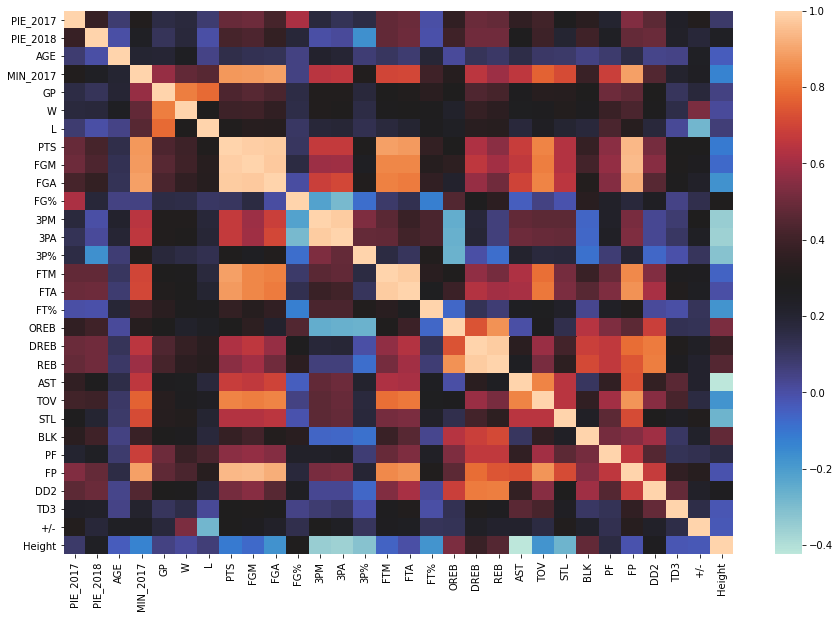

In [15]:
# Heatmap of Correlation Matrix

plt.figure(figsize=(15,10))

sns.heatmap(df_30_cols.corr(),cmap='icefire')

plt.show()
# plt.savefig('corr_heat_map_30.png')

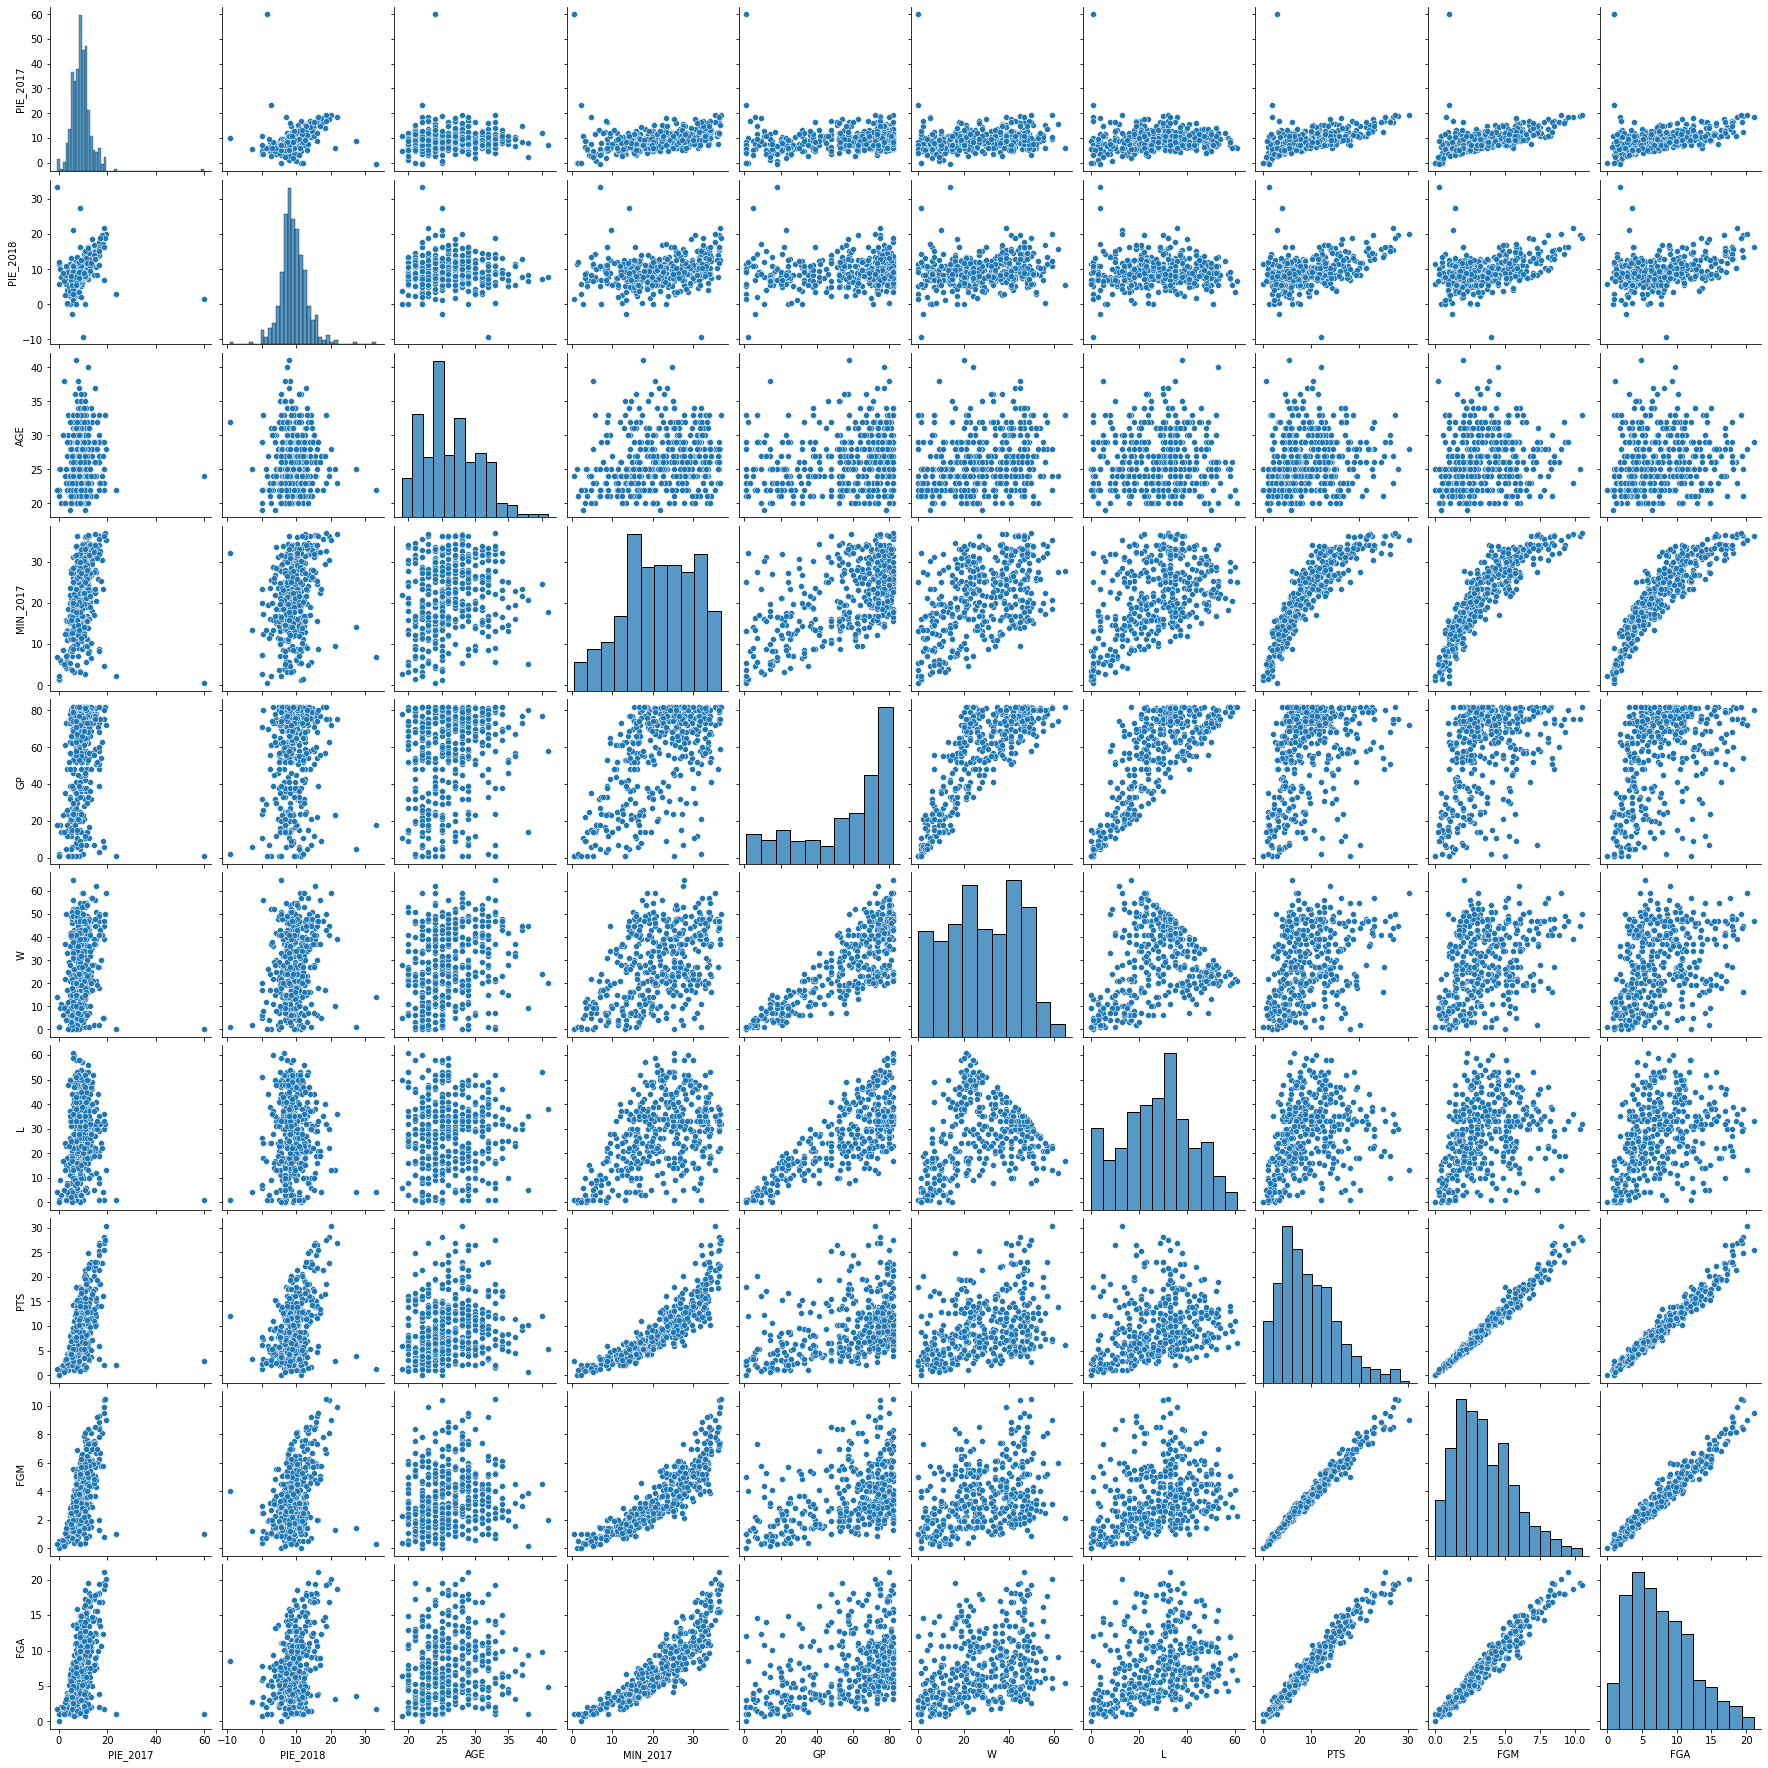

In [16]:
# Smaller subset of datarame for a scatter matrix

df_10_cols = df.iloc[:,4:14]
sns.pairplot(df_10_cols)

plt.show()
# plt.savefig('scatter_matrix_10.png')

In [17]:
# Examining 20 highest correlation values with PIE played in the 2018 season.

corr_PIE_2018 = df.corr().PIE_2018
corr_PIE_2018  = np.abs(corr_PIE_2018).sort_values(ascending = False)
corr_PIE_2018[:20]


PIE_2018                 1.000000
FGM_und_5ft              0.539710
FGA_und_5ft              0.512026
DREB                     0.507528
REB                      0.506555
REBChances               0.506492
FTA                      0.501220
DD2                      0.496781
FP                       0.486011
FTM                      0.477237
ContestedREB             0.469467
FGM                      0.436021
FGA_5_9ft                0.430132
PTS                      0.419679
FGM_5_9ft                0.419336
Player_RebOn_Box_Outs    0.409831
REB%                     0.407562
OREB                     0.404361
BLK                      0.403350
Contested2PT_Shots       0.400811
Name: PIE_2018, dtype: float64

__Examining distributions of each variable.__

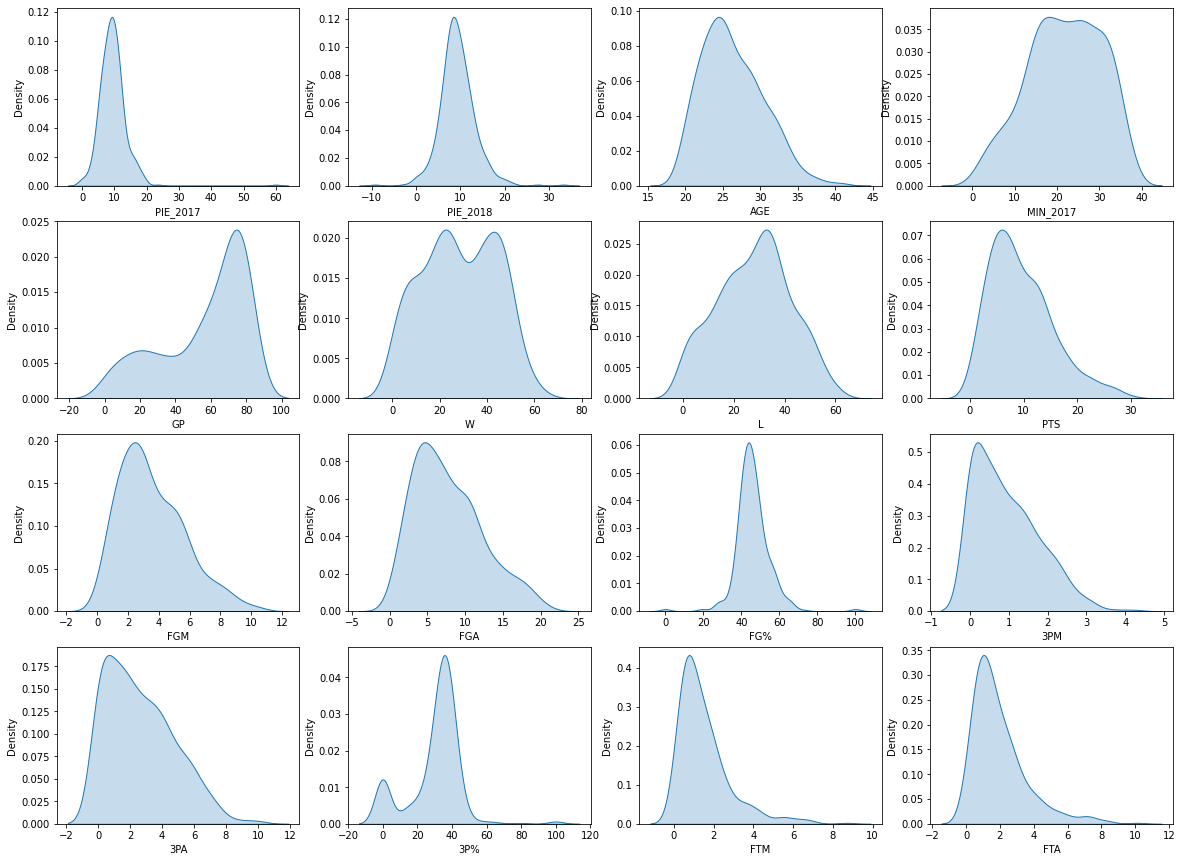

In [18]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,6))

# sns.distplot(df.PIE_2018,ax=ax1)
# sns.distplot(df.PIE_2017, ax=ax2)
# plt.show()

plt.figure(figsize=(20,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df.iloc[:,i+4], shade=True)

plt.show()
# plt.savefig('kdeplot_16.png')    

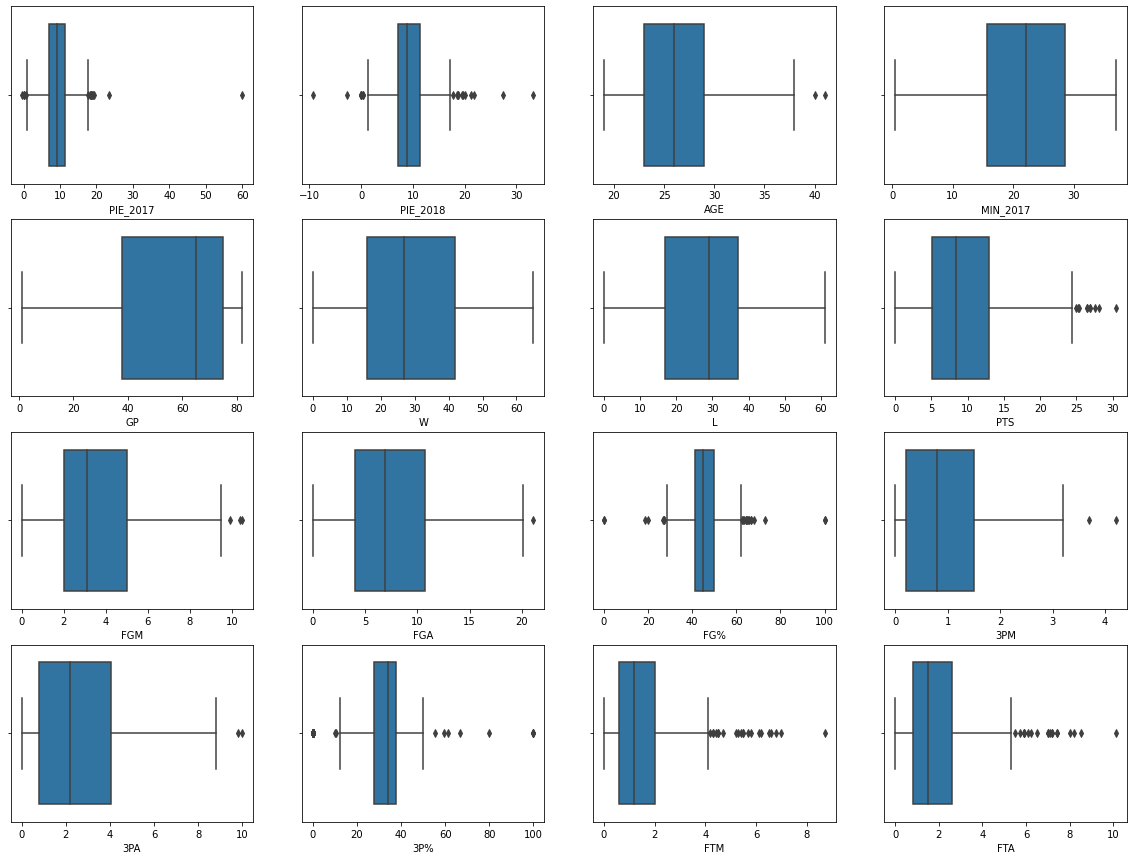

In [19]:
plt.figure(figsize=(20,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = df.iloc[:,i+4])

plt.show()    
# plt.savefig('boxplot_16.png')      

### Dropping columns with any occurence of Field Goals Attempted, given that with Field Goals Made and Field Goal Percentage, this is a redundant statistic.

In [20]:
fga_cols = [col for col in df.columns  if 'FGA' in col]
fga_cols

['FGA',
 'FGA_und_5ft',
 'FGA_5_9ft',
 'FGA_10_14ft',
 'FGA_15_19ft',
 'OPP_FGA_und_5ft',
 'OPP_FGA_5_9ft',
 'OPP_FGA_10_14ft',
 'OPP_FGA_15_19ft',
 'OPP_FGA_20_24ft',
 'OPP_FGA_25_29ft']

In [21]:
print("Dataframe shape before Drop:", df.shape)
df.drop(columns=fga_cols, inplace=True)
print("Dataframe shape after Drop:", df.shape)

Dataframe shape before Drop: (412, 112)
Dataframe shape after Drop: (412, 101)


### Checking for highly correlated columns (excluding response variable)

In [22]:
df_no_response = df.drop(columns='PIE_2018')

In [23]:
#Checking for colinearity between variables

#Creating correlation matrix of the variable and their absolute value to check for high correlation.

corr_mat = df_no_response.corr().abs()
corr_mat

,PIE_2017,AGE,MIN_2017,GP,W,L,PTS,FGM,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,Box_Outs,OFF_Box_Outs,DEF_Box_Outs,Team_RebOn_Box_Outs,Player_RebOn_Box_Outs,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,PotentialAST,AST_PTS_Created,ASTAdj,AST_ToPass%,AST_ToPass%_Adj,ScreenAssists,ScreenAssists_PTS,Deflections,OFF_Loose_BallsRecovered,DEF_Loose_BallsRecovered,Loose_BallsRecovered,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,ContestedShots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,REB%,eFG%,TS%,USG%,PACE
PIE_2017,1.000000,0.078691,0.309466,0.158400,0.174268,0.076810,0.493182,0.504441,0.620919,0.172476,0.124917,0.159081,0.480854,0.494454,0.003459,0.362910,0.496295,0.484382,0.361425,0.405408,0.280351,0.341562,0.206879,0.543219,0.470709,0.235351,0.310070,0.092033,0.192553,0.212330,0.288529,0.283599,0.265856,0.305112,0.356103,0.184152,0.235457,0.069694,0.269788,0.412403,0.070609,0.477384,0.027813,0.355953,0.052815,0.220077,0.408275,0.364042,0.256364,0.350994,0.360104,0.355161,0.138898,0.116797,0.307367,0.305709,0.268572,0.384676,0.253907,0.341491,0.063642,0.081797,0.056670,0.343236,0.153289,0.336582,0.507008,0.066095,0.374039,0.125812,0.346629,0.127822,0.291818,0.114335,0.278828,0.256435,0.279273,0.069338,0.305467,0.100036,0.250009,0.114289,0.264511,0.155810,0.286545,0.078207,0.335758,0.520476,0.314568,0.219522,0.251987,0.272016,0.658881,0.704918,0.578353,0.282781
AGE,0.078691,1.000000,0.203913,0.193401,0.255379,0.047274,0.147862,0.131258,0.051998,0.217529,0.193940,0.070925,0.106194,0.079246,0.189570,0.018906,0.116083,0.094108,0.150667,0.094703,0.090002,0.048484,0.081636,0.156316,0.040222,0.046867,0.244511,0.037275,0.094765,0.011140,0.123910,0.061348,0.137208,0.137096,0.092341,0.005802,0.051681,0.058785,0.015884,0.038181,0.063002,0.089916,0.023174,0.184400,0.010803,0.075727,0.152136,0.129354,0.135040,0.131904,0.148830,0.152732,0.133482,0.136946,0.115890,0.117228,0.110736,0.062755,0.138120,0.117778,0.007609,0.096314,0.139474,0.068648,0.084123,0.085773,0.024185,0.071021,0.063591,0.189523,0.123044,0.088233,0.133962,0.134612,0.183666,0.012935,0.165400,0.055277,0.205419,0.026015,0.140180,0.005198,0.171686,0.050202,0.205663,0.021151,0.064167,0.126924,0.100427,0.044693,0.026518,0.027840,0.116451,0.129896,0.015609,0.094515
MIN_2017,0.309466,0.203913,1.000000,0.582039,0.482158,0.454910,0.877421,0.878904,0.051536,0.646502,0.656359,0.305916,0.700249,0.707632,0.398843,0.322980,0.651706,0.589346,0.657214,0.767346,0.719118,0.383908,0.682798,0.893351,0.444114,0.210171,0.249561,0.133730,0.062906,0.350913,0.250483,0.150665,0.268068,0.275604,0.220379,0.015538,0.254540,0.278126,0.091048,0.346899,0.093680,0.650210,0.100576,0.659810,0.124417,0.165740,0.799432,0.784947,0.628794,0.655306,0.658600,0.668062,0.407431,0.432844,0.170719,0.173400,0.738064,0.756174,0.757794,0.832549,0.100869,0.230903,0.175192,0.480311,0.807947,0.677403,0.624945,0.057193,0.511034,0.149532,0.545367,0.209437,0.593074,0.270375,0.966736,0.038189,0.889322,0.030343,0.884332,0.023350,0.832519,0.136489,0.896417,0.138176,0.946047,0.038052,0.061691,0.154298,0.360224,0.136528,0.081312,0.099239,0.108660,0.160154,0.404958,0.229050
GP,0.158400,0.193401,0.582039,1.000000,0.824250,0.786106,0.434794,0.455561,0.156064,0.309320,0.304210,0.181281,0.285165,0.308605,0.341730,0.289962,0.440323,0.419796,0.273594,0.329351,0.321292,0.281967,0.503038,0.475463,0.287772,0.111486,0.176601,0.051086,0.108455,0.279915,0.320212,0.215220,0.333544,0.330705,0.2

In [24]:
corr_mat.columns.shape

(96,)

In [25]:
import operator

# creating a dictionary to store correlations, and 
# sort for variables by highest correlation.
corr_dict = {}

for col in corr_mat.columns:
    for row in corr_mat.index:
        corr_dict[col,row] = corr_mat[col][row]


# Slicing this sorted list as the first 96 items are the diagonal off the correlation matrix of the variables correlated with themselves.
corr_tuples = sorted(corr_dict.items(), key=operator.itemgetter(1),reverse=True)[96:]

# # Analyzing the 50 highest correlated variables (Filtering for every other value in list
# # as the correlation matrix mirrors itself on either side of the diagonal.

corr_tuples[:100:2]


[(('ScreenAssists', 'ScreenAssists_PTS'), 0.9985070878240818),
 (('AST', 'AST_PTS_Created'), 0.9977891015172934),
 (('AST', 'ASTAdj'), 0.9969383930103991),
 (('AST_PTS_Created', 'ASTAdj'), 0.9955435362640134),
 (('PotentialAST', 'AST_PTS_Created'), 0.9908592502079132),
 (('PotentialAST', 'ASTAdj'), 0.990652883680278),
 (('Box_Outs', 'Team_RebOn_Box_Outs'), 0.9902023529753646),
 (('AST', 'PotentialAST'), 0.9899018555824932),
 (('PTS', 'FGM'), 0.9874438166142769),
 (('FTM', 'FTA'), 0.982328301977304),
 (('AST_ToPass%', 'AST_ToPass%_Adj'), 0.9822503831663848),
 (('3PM', '3PA'), 0.9820911481982575),
 (('REB', 'REBChances'), 0.9818162948682142),
 (('eFG%', 'TS%'), 0.9784818278715302),
 (('REBChance%', 'AdjustedREB_Chance%'), 0.9784279270299536),
 (('Box_Outs', 'DEF_Box_Outs'), 0.9780119465453672),
 (('DREB', 'REB'), 0.9778180830151334),
 (('MIN_2017', 'OPP_FGM_und_5ft'), 0.9667355113157368),
 (('DEF_Box_Outs', 'Team_RebOn_Box_Outs'), 0.9653974631637331),
 (('DREB', 'REBChances'), 0.95724139

### Dropping Columns with High Colinearity Containing Minimal Unique Information

In [26]:
# Cols to drop:
# Dropping 3PA and 3PM (captured by FGM 25-29ft)
# Dropping ScreenAssists'(not'ScreenAssists_PTS') redundant,keeping PTS because might contain slightly more information 
# Dropping 'AST', 'AST_PTS_Created','PotentialAST'(not ASTAdj) these three variables are redundant, over 0.99 correlation with each other.
# Dropping 'Box_Outs' (not'Team_RebOn_Box_Outs') over .98 correlation, latter has more information
# Keeping both 'eFG%', 'TS%' as their formulas calculate separate thing (efg Formula: ((FGM + (0.5 * 3PM)) / FGA /// TS% Formula: Points/ [2*(Field Goals Attempted+0.44*Free Throws Attempted)]
# Keeping 'REB', 'REBChances' as they measure difference things
# Dropping 'REB' as it is captured in Offenseive and Defensive Rebounds
# Dropping 'REBChance%' (keeping'AdjustedREB_Chance%') redundant
# Keeping both 'PTS', 'FP' (fantasy points) measure different things (fp: Pts: 1 Rebs: 1.2 Ast: 1.5 Stl: 3 Blocks: 3 TO: -1
# dropping these columns as well as they are equivalent and redundant to other variables, often more accurately conveyed as a percentage: FTA,Team_RebOn_Box_Outs, Player_RebOn_Box_Outs,ContestedREB,Loose_BallsRecovered,ContestedShots, OREB, DREB

colinear_cols = ['3PA','3PM', 'ScreenAssists','AST', 'AST_PTS_Created','PotentialAST', 'Box_Outs','REB',
                 'REBChance%', 'FTA', 'Team_RebOn_Box_Outs', 'Player_RebOn_Box_Outs', 'ContestedREB', 
                 'Loose_BallsRecovered', 'ContestedShots', 'OREB', 'DREB', 'REB%','FG%','OFF_Box_Outs',
                 'DEF_Box_Outs', 'REBChances', 'AST_ToPass%', 'OFF_Loose_BallsRecovered', 'DEF_Loose_BallsRecovered']


In [27]:
# Dropping columns with high colinearity

print("Dataframe shape before Drop:", df.shape)
df.drop(columns=colinear_cols, inplace=True)
print("Dataframe shape after Drop:", df.shape)

Dataframe shape before Drop: (412, 101)
Dataframe shape after Drop: (412, 76)


In [28]:
#### Checking correlation matrix again to see if there are any other columns to drop:

df_no_response = df.drop(columns='PIE_2018')
corr_mat = df_no_response.corr().abs()

corr_dict = {}

for col in corr_mat.columns:
    for row in corr_mat.index:
        corr_dict[col,row] = corr_mat[col][row]
        
corr_tuples = sorted(corr_dict.items(), key=operator.itemgetter(1),reverse=True)[76:]

# Analyzing 20 highest correlations
corr_tuples[:40:2]

[(('OPP_FGM_und_5ft', 'MIN_2017'), 0.9667355113157368),
 (('FP', 'FGM'), 0.947759711235779),
 (('OPP_FGM_25_29ft', 'MIN_2017'), 0.946046722786871),
 (('FP', 'PTS'), 0.9419736812029327),
 (('ASTAdj', 'PassesReceived'), 0.9353880527612904),
 (('Deflections', 'STL'), 0.9249228381780334),
 (('PassesReceived', 'PassesMade'), 0.9248170693728271),
 (('OPP_FGM_25_29ft', 'OPP_FGM_und_5ft'), 0.9220358114607462),
 (('OPP_FGM_20_24ft', 'MIN_2017'), 0.8964169475454867),
 (('FP', 'MIN_2017'), 0.8933511123802572),
 (('FTM', 'PTS'), 0.8898465673372127),
 (('OPP_FGM_5_9ft', 'MIN_2017'), 0.8893219628413565),
 (('OPP_FGM_10_14ft', 'MIN_2017'), 0.8843320788789428),
 (('FGM', 'MIN_2017'), 0.8789035808723781),
 (('PTS', 'MIN_2017'), 0.8774214542467973),
 (('FP', 'TOV'), 0.8689319059767098),
 (('OPP_FGM_und_5ft', 'PTS'), 0.8640435688784954),
 (('OPP_FGM_20_24ft', 'OPP_FGM_und_5ft'), 0.8617880053292214),
 (('OPP_FGM_und_5ft', 'FP'), 0.8617374595541413),
 (('OPP_FGM_und_5ft', 'FGM'), 0.8617295451602216)]

#### The remaining variables are still highly correlated but contain some unique element of information.

In [29]:
df.head()

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE
0,Aaron Gordon,ORL,Arizona,USA,11.3,10.9,22,32.9,58,19,39,17.6,6.5,33.6,2.7,69.8,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,81.0,220,4,7.0,93.0,85.2,23.9,33.5,0.7,61.1,6.0,40.2,32.5,0.2,2.7,6.6,1.9,1.4,42.9,57.1,0.07,4.7,1.8,3.2,66.7,0.2,20.0,0.4,35.7,0.5,29.8,14.4,63.2,2.3,37.1,2.2,42.4,2.5,42.4,3.7,40.3,3.8,33.9,108.3,-2.0,11.1,4.4,19.1,50.0,53.0,23.8,100.43
1,Abdel Nader,BOS,Iowa State,Egypt,3.3,6.6,24,10.9,48,33,15,3.0,1.0,35.4,0.5,59.0,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,78.0,230,58,17.5,82.5,92.0,12.0,29.6,0.2,62.3,7.0,8.7,9.1,0.1,0.7,8.6,0.3,0.7,38.9,61.1,0.00,1.5,1.3,0.4,40.4,0.1,20.0,0.0,20.0,0.0,0.0,4.2,59.8,0.5,26.8,0.6,41.9,0.8,42.2,1.3,43.1,1.7,39.8,107.3,-10.3,7.8,2.4,11.1,41.3,43.9,16.2,100.46
2,Al Horford,BOS,Florida,Dominican Rep...,13.4,13.4,32,31.6,72,47,25,12.9,5.1,42.9,1.3,78.3,1.8,0.6,1.1,1.9,32.0,15,0,4.8,82.0,245,3,7.3,92.7,90.4,33.3,33.9,0.6,60.6,6.4,48.9,42.9,0.3,5.1,10.4,6.5,1.3,52.6,47.4,0.00,8.8,3.5,1.9,67.5,0.8,40.7,0.5,37.3,0.4,49.2,11.5,59.8,1.8,33.9,1.8,36.0,2.4,35.7,3.4,41.2,3.5,29.8,101.6,7.3,22.5,4.7,17.8,55.3,57.5,18.3,97.23
3,Al-Farouq Aminu,POR,Wake Forest,USA,9.0,9.7,27,30.0,69,40,29,9.3,3.3,36.9,0.9,73.8,1.1,1.1,0.6,2.0,24.3,9,0,3.2,81.0,220,8,16.2,83.8,88.5,40.5,29.1,0.7,62.4,5.9,25.0,19.1,0.2,1.6,6.3,3.5,2.2,42.4,57.6,0.00,5.7,3.0,1.2,58.9,0.2,24.5,0.0,16.7,0.0,11.1,10.3,54.1,2.3,43.3,2.1,38.5,2.6,43.6,3.5,39.5,3.4,36.8,104.4,5.2,5.6,4.5,19.8,50.3,52.2,14.5,98.47
4,Alan Williams,PHX,California-Santa Barbara,USA,8.9,27.4,25,14.1,5,1,4,4.0,1.4,0.0,1.2,66.7,1.4,1.0,0.2,2.6,13.9,0,0,0.2,80.0,265,61,11.8,88.2,87.5,37.5,27.3,0.0,45.8,4.0,17.6,15.6,0.0,2.0,11.4,4.0,1.0,0.0,100.0,0.00,1.2,1.0,0.8,57.1,0.6,37.5,0.0,0.0,0.0,0.0,4.2,44.7,1.0,45.5,0.8,50.0,0.8,36.4,1.2,54.5,1.4,26.9,90.8,0.1,19.5,3.9,26.0,38.9,45.5,18.4,97.25


## Filtering Outliers 
#### - With only 400 hundred players with which to train this regression model, we do not want to filter out very many players from out analysis. However there is a small subset of players who for various reasons (injury, left league, retired) did not have significant playing time to have representative statistics of playing a full season, thus these players will be removed from this analysis


In [31]:
# dataframe checkpoint
df_no_filter = df.copy()

In [32]:
#Examining players who played less than THREE games in the 2017 season

df[df.GP < 3]

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE
15,Andre Ingram,LAL,American,USA,9.9,-9.3,32,32.1,2,1,1,12.0,4.0,55.6,1.5,100.0,1.5,1.5,1.5,1.5,28.4,0,0,10.0,75.0,190,61,0.0,0.0,0.0,0.0,0.0,0.5,85.7,10.2,23.0,26.5,0.0,3.5,15.2,1.5,1.0,0.0,100.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,1.5,75.0,0.0,0.0,14.5,59.2,1.0,25.0,3.5,63.6,0.0,0.0,2.5,35.7,5.0,35.7,95.1,14.1,14.9,1.6,7.2,61.8,65.5,13.6,106.28
52,Chris Boucher,GSW,Oregon,Canada,0.0,11.4,25,1.3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0,0,-2.0,82.0,200,61,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.9,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,-100.0,0.0,0.0,100.0,0.0,0.0,33.3,91.14
96,Devin Robinson,WAS,Florida,USA,8.5,11.2,23,13.2,1,0,1,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,11.0,0,0,10.0,80.0,200,61,0.0,100.0,0.0,0.0,40.0,0.0,62.5,4.7,17.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.7,1.0,50.0,0.0,0.0,1.0,20.0,0.0,0.0,2.0,66.7,85.2,28.6,0.0,9.5,25.0,33.3,33.3,8.3,101.72
114,Edmond Sumner,IND,Xavier,USA,23.5,2.8,22,2.2,1,0,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.2,0,0,-6.0,77.0,188,52,0.0,0.0,0.0,0.0,0.0,0.0,100.0,6.5,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,160.0,-120.0,0.0,0.0,50.0,100.0,100.0,20.0,110.77
139,Gordon Hayward,BOS,Butler,USA,4.8,11.4,28,5.3,1,0,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.2,0,0,3.0,80.0,226,9,0.0,0.0,0.0,0.0,0.0,0.0,25.0,21.8,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,1.0,50.0,0.0,0.0,1.0,50.0,0.0,0.0,1.0,100.0,0.0,0.0,81.8,27.3,0.0,0.0,20.0,50.0,50.0,15.4,100.57
185,Jeremy Lin,BKN,Harvard,USA,7.1,10.0,29,25.2,1,0,1,18.0,5.0,50.0,7.0,100.0,3.0,0.0,0.0,3.0,21.0,0,0,-6.0,75.0,200,61,0.0,100.0,100.0,0.0,0.0,1.0,0.0,0.0,32.0,49.0,0.0,4.0,12.5,0.0,3.0,0.0,0.0,0.0,3.0,1.0,3.0,50.0,0.0,0.0,0.0,0.0,1.0,33.3,16.0,76.2,2.0,66.7,0.0,0.0,6.0,75.0,2.0,33.3,3.0,21.4,119.0,-9.5,23.5,0.0,0.0,45.8,59.7,25.4,120.08
216,Justin Patton,MIN,Creighton,USA,5.7,5.1,21,3.7,1,0,1,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0,0,3.0,84.0,236,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1.0,33.3,90.0,30.0,0.0,0.0,0.0,50.0,50.0,20.0,128.57
256,Luol Deng,LAL,Duke,United Kingdo...,3.9,9.3,33,13.1,1,0,1,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.5,0,0,-7.0,81.0,220,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,7.0,0.0,1.0,11.1,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,43.8,0.0,0.0,0.0,0.0,1.0,50.0,2.0,66.7,3.0,42.9,110.0,-20.3,11.1,0.0,0.0,50.0,50.0,9.1,107.82
289,Naz Mitrou-Long,UTA,Iowa State,Canada,60.0,1.6,24,0.5,1,0,1,3.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,5.0,76.0,218,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,150.0,150.0,50.0,139.35
306,PJ Dozier,OKC,South Carolina,USA,0.0,12.1,21,1.6,2,1,1,1.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.5,1.1,0,0,-1.5,78.0,205,61,0.0,0.0,0.0,0.0,0.0,0.0,100.0,6.6,1.0,1.5,0.0,0.0,0.0,0.0,0.

#### Filtering outlier players that played in less than three games (most of these players had significant injuries or switched to playing in European or Canadian basketball leagues). These factors are outside the scope of this regression model.


In [ ]:
#Filtering outlier players that played in less than three games.

df = df[df.GP >= 3]

In [34]:
# Examining Players who played under five minutes a game
# We will not filter out these players as they had consistent playing time thoroughout the season.

df[df.MIN_2017 <5 ]

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE
9,Alex Poythress,IND,Kentucky,USA,3.2,6.9,24,4.2,25,10,15,1.0,0.4,36.4,0.0,0.0,0.1,0.1,0.0,0.6,2.4,0,0,-0.8,81.0,235,61,38.5,61.5,88.9,55.6,47.1,0.0,47.2,7.2,3.8,2.4,0.0,0.1,3.2,0.4,0.2,33.3,66.7,0.0,0.6,0.4,0.3,58.3,0.0,0.0,0.0,0.0,0.0,0.0,1.8,69.8,0.5,50.0,0.5,75.0,0.3,29.4,0.5,33.3,0.5,27.8,115.8,-13.0,2.6,6.1,10.2,50.0,50.0,11.2,97.73
10,Alfonzo McKinnie,TOR,Wisconsin-Green Bay,USA,5.2,6.5,25,3.8,14,13,1,1.5,0.6,33.3,0.1,66.7,0.2,0.1,0.1,0.6,2.4,0,0,-1.0,80.0,215,61,14.3,85.7,100.0,0.0,57.1,0.2,77.8,3.2,3.1,3.0,0.1,0.1,4.5,0.0,0.1,0.0,0.0,0.0,0.5,0.3,0.1,100.0,0.2,66.7,0.0,0.0,0.2,100.0,1.4,57.1,0.6,28.6,0.3,100.0,0.5,50.0,0.7,36.8,0.6,35.3,114.0,-12.3,2.7,2.2,9.8,63.3,64.3,15.8,102.40
52,Chris Boucher,GSW,Oregon,Canada,0.0,11.4,25,1.3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0,0,-2.0,82.0,200,61,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.9,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,-100.0,0.0,0.0,100.0,0.0,0.0,33.3,91.14
62,D.J. Wilson,MIL,Michigan,USA,6.5,7.5,22,3.2,22,12,10,1.0,0.4,40.0,0.0,50.0,0.2,0.1,0.0,0.3,2.1,0,0,-1.9,82.0,236,17,0.0,100.0,100.0,50.0,20.0,0.0,83.3,6.4,3.9,2.7,0.0,0.2,4.7,0.4,0.1,0.0,0.0,0.0,0.6,0.4,0.3,83.3,0.2,100.0,0.0,0.0,0.0,0.0,1.7,69.8,0.6,83.3,0.1,33.3,0.4,33.3,0.4,31.6,0.6,52.6,112.9,-30.7,7.5,2.9,15.7,62.5,62.2,12.7,100.93
67,Daniel Hamilton,OKC,Connecticut,USA,18.6,7.0,22,4.6,6,5,1,2.0,0.8,40.0,0.0,0.0,0.3,0.2,0.0,0.3,5.2,0,0,-2.0,79.0,195,56,0.0,0.0,0.0,0.0,0.0,0.3,45.5,3.8,8.2,9.2,0.0,1.3,16.3,0.0,0.2,0.0,100.0,0.0,0.3,0.5,0.3,50.0,0.0,0.0,0.3,100.0,0.0,0.0,2.2,72.2,0.5,20.0,1.0,50.0,0.3,50.0,0.7,40.0,0.2,8.3,101.8,-22.8,61.5,0.0,16.7,54.5,54.5,20.0,97.81
114,Edmond Sumner,IND,Xavier,USA,23.5,2.8,22,2.2,1,0,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.2,0,0,-6.0,77.0,188,52,0.0,0.0,0.0,0.0,0.0,0.0,100.0,6.5,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,160.0,-120.0,0.0,0.0,50.0,100.0,100.0,20.0,110.77
134,Georges Niang,UTA,Iowa State,USA,8.6,9.0,25,3.5,9,9,0,1.0,0.4,0.0,0.1,50.0,0.3,0.2,0.0,0.1,3.0,0,0,-1.4,78.0,231,50,11.1,88.9,100.0,40.0,0.0,0.0,90.0,10.9,3.1,3.6,0.0,0.2,7.1,0.0,0.2,100.0,0.0,0.0,0.6,0.2,0.3,66.7,0.3,66.7,0.0,0.0,0.0,0.0,1.1,75.0,0.3,28.6,0.7,57.1,0.2,14.3,0.8,38.5,0.3,28.6,98.6,-18.1,16.7,10.3,18.2,36.4,37.9,19.0,109.09
148,Ike Anigbogu,IND,UCLA,USA,10.9,0.0,19,2.7,11,5,6,1.2,0.4,0.0,0.5,83.3,0.2,0.1,0.3,0.1,3.1,0,0,-1.3,82.0,262,47,9.1,90.9,100.0,40.0,55.6,0.2,47.4,6.8,4.0,2.5,0.0,0.0,0.0,0.6,0.1,33.3,66.7,0.0,1.0,0.2,0.1,50.0,0.0,0.0,0.1,33.3,0.3,66.7,1.8,64.3,0.7,66.7,0.6,83.3,0.3,33.3,0.2,20.0,0.3,37.5,130.2,-25.5,0.0,15.2,13.8,44.4,55.8,17.9,103.12
165,Jake Layman,POR,Maryland,USA,2.7,8.2,24,4.6,35,22,13,1.0,0.4,20.0,0.1,66.7,0.1,0.2,0.1,0.4,2.7,0,0,-0.6,81.0,210,47,16.7,83.3,87.5,25.0,31.3,0.1,66.7,6.4,3.6,3.9,0.0,0.3,9.4,0.1,0.2,40.0,60.0,0.0,0.6,0.2,0.2,58.3,0.0,0.0,0.0,20.0,0.1,66.7,1.6,58.8,0.5,52.4,0.3,36.4,0.3,33.3,0.7,38.2,0.7,40.4,106.2,-11.5,9.9,2.4,7.8,34.0,35.2,13.9,99.25
216,Justin Patton,MIN,Creighton,USA,5.7,5.1,21,3.7,1,0,1,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0,0,3.0,84

In [36]:
#Examining Players with under a PIE of 1 for 2017

df[df.PIE_2017 < 1]

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE
52,Chris Boucher,GSW,Oregon,Canada,0.0,11.4,25,1.3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0,0,-2.0,82.0,200,61,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.9,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,-100.0,0.0,0.0,100.0,0.0,0.0,33.3,91.14
219,Kadeem Allen,BOS,Arizona,USA,0.6,10.1,25,6.0,18,9,9,1.1,0.3,0.0,0.4,77.8,0.5,0.2,0.1,0.8,3.1,0,0,-1.1,75.0,200,53,28.6,71.4,66.7,33.3,27.3,0.1,44.0,6.6,8.8,8.9,0.1,0.7,8.2,0.7,0.4,0.0,100.0,0.0,0.3,0.5,0.4,55.6,0.0,0.0,0.1,50.0,0.0,0.0,3.7,64.9,0.3,27.3,0.3,33.3,0.4,37.5,0.5,37.5,1.2,29.8,100.0,-8.4,16.7,3.4,6.7,27.3,36.6,13.2,101.43
306,PJ Dozier,OKC,South Carolina,USA,0.0,12.1,21,1.6,2,1,1,1.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.5,1.1,0,0,-1.5,78.0,205,61,0.0,0.0,0.0,0.0,0.0,0.0,100.0,6.6,1.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,-33.3,0.0,0.0,20.0,50.0,50.0,42.9,97.86
386,Tyler Lydon,DEN,Syracuse,USA,0.0,5.7,22,2.2,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-6.0,81.0,220,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1.0,100.0,0.0,0.0,1.0,100.0,0.0,0.0,1.0,100.0,225.0,-150.0,0.0,0.0,0.0,0.0,0.0,0.0,88.62
411,Zhou Qi,HOU,None,China,-0.5,33.3,22,6.9,18,14,4,1.2,0.3,10.5,0.4,66.7,0.6,0.1,0.8,0.8,5.0,0,0,-3.7,85.0,210,43,17.4,82.6,80.0,46.7,54.5,0.1,44.9,5.1,5.6,4.2,0.0,0.2,3.0,0.8,0.4,0.0,100.0,0.0,2.5,0.8,0.2,42.9,0.1,33.3,0.0,0.0,0.0,0.0,2.5,57.0,0.6,37.0,0.4,40.0,0.5,58.3,0.8,35.0,1.1,36.4,107.6,-26.1,2.8,4.2,11.6,21.9,29.5,16.3,102.22


In [37]:
#Examining Players with under a PIE of 1 for 2018

df[df.PIE_2018 < 1]

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE
15,Andre Ingram,LAL,American,USA,9.9,-9.3,32,32.1,2,1,1,12.0,4.0,55.6,1.5,100.0,1.5,1.5,1.5,1.5,28.4,0,0,10.0,75.0,190,61,0.0,0.0,0.0,0.0,0.0,0.5,85.7,10.2,23.0,26.5,0.0,3.5,15.2,1.5,1.0,0.0,100.0,1.00,3.0,4.0,0.0,0.0,0.0,0.0,1.5,75.0,0.0,0.0,14.5,59.2,1.0,25.0,3.5,63.6,0.0,0.0,2.5,35.7,5.0,35.7,95.1,14.1,14.9,1.6,7.2,61.8,65.5,13.6,106.28
148,Ike Anigbogu,IND,UCLA,USA,10.9,0.0,19,2.7,11,5,6,1.2,0.4,0.0,0.5,83.3,0.2,0.1,0.3,0.1,3.1,0,0,-1.3,82.0,262,47,9.1,90.9,100.0,40.0,55.6,0.2,47.4,6.8,4.0,2.5,0.0,0.0,0.0,0.6,0.1,33.3,66.7,0.00,1.0,0.2,0.1,50.0,0.0,0.0,0.1,33.3,0.3,66.7,1.8,64.3,0.7,66.7,0.6,83.3,0.3,33.3,0.2,20.0,0.3,37.5,130.2,-25.5,0.0,15.2,13.8,44.4,55.8,17.9,103.12
196,John Holland,CLE,Boston University,USA,3.4,0.0,29,7.3,24,17,7,2.3,0.7,30.6,0.4,69.2,0.3,0.3,0.1,0.4,4.6,0,0,-1.2,77.0,205,61,3.7,96.3,81.0,23.8,29.2,0.1,55.8,9.7,5.0,5.7,0.1,0.3,5.8,0.2,0.4,30.0,70.0,0.08,1.0,0.7,0.3,38.5,0.0,0.0,0.1,25.0,0.0,0.0,3.7,60.2,0.8,46.2,0.8,57.1,0.6,45.8,1.2,47.9,1.3,32.1,112.3,-8.8,4.0,3.6,10.4,38.1,41.7,17.8,101.12
234,Kobi Simmons,MEM,Arizona,USA,4.6,0.0,20,20.1,32,6,26,6.1,2.5,28.2,0.8,100.0,1.4,0.6,0.2,1.9,12.0,0,0,-6.7,76.0,170,61,20.0,80.0,50.0,0.0,18.0,0.2,47.6,9.8,31.5,36.3,0.3,2.4,7.6,0.3,0.8,50.0,50.0,0.19,1.3,1.3,1.5,64.0,0.2,28.6,0.3,38.5,0.1,17.6,8.1,65.7,1.2,36.2,1.4,49.5,1.3,42.3,3.0,49.2,2.7,35.9,117.7,-17.0,15.7,2.1,6.2,45.2,49.0,16.3,97.89
257,Malachi Richardson,TOR,Syracuse,USA,3.5,0.3,22,12.4,26,8,18,3.4,1.2,30.0,0.7,77.3,0.4,0.4,0.0,1.0,6.6,0,0,-2.2,78.0,205,22,0.0,100.0,81.8,18.2,26.5,0.2,60.7,7.0,10.3,11.1,0.1,0.6,5.6,0.2,0.7,66.7,33.3,0.04,0.7,1.5,0.3,29.2,0.1,50.0,0.0,25.0,0.3,50.0,4.8,69.3,0.7,34.7,0.5,40.6,0.5,32.4,1.8,45.3,2.0,38.3,108.0,-7.8,5.8,1.5,9.7,40.0,44.6,14.9,98.58
293,Nick Young,GSW,Southern California,USA,6.1,0.3,33,17.4,80,56,24,7.3,2.5,37.7,0.7,86.2,0.5,0.5,0.1,1.3,11.0,0,0,0.5,79.0,210,16,6.7,93.3,82.2,13.7,20.8,0.2,54.3,10.1,12.0,15.8,0.1,0.6,4.6,0.9,0.8,31.8,68.2,0.03,1.8,1.6,0.3,70.3,0.0,25.0,0.3,53.5,0.3,40.4,6.8,60.6,1.3,40.1,1.3,44.1,1.1,34.7,1.7,35.0,2.4,35.8,106.0,0.8,3.8,1.5,7.1,53.8,56.2,16.9,101.41
302,Okaro White,CLE,Florida State,USA,5.7,-2.8,25,13.3,6,2,4,3.3,1.2,36.4,0.3,66.7,0.2,0.2,0.2,1.0,6.9,0,0,-0.2,80.0,215,61,20.0,80.0,85.7,42.9,45.5,0.3,45.8,6.0,16.7,8.7,0.2,0.5,3.0,0.7,0.5,100.0,0.0,0.33,2.7,1.2,0.4,50.0,0.0,0.0,0.2,100.0,0.0,0.0,6.4,57.1,1.3,44.4,1.2,40.0,0.6,33.3,0.8,18.2,2.2,45.8,100.6,0.6,3.4,4.1,9.9,56.3,57.7,10.1,100.15
387,Tyler Ulis,PHX,Kentucky,USA,7.3,0.0,22,23.4,71,20,51,7.8,3.0,28.8,1.2,83.2,1.8,1.0,0.1,1.7,18.0,4,0,-4.4,70.0,160,34,0.0,100.0,95.8,14.6,10.9,0.3,45.9,12.5,42.2,48.7,0.4,5.1,12.2,0.6,2.0,40.9,59.1,0.04,2.1,1.7,0.5,40.0,0.3,46.9,0.9,46.2,0.6,38.3,9.1,61.0,1.6,42.5,1.7,41.4,1.9,43.3,2.7,39.6,3.3,37.5,110.0,-8.6,28.2,1.4,6.1,42.6,46.5,18.4,100.85


#### Dropping Players with a PIE of less than 1 from both the 2017 and 2018 season as they essentially did not play or contribute in those seasons. Upon investigation, many of these players had significant injuries in one of the two seasons, which is beyond the scope of this regression model.

In [41]:
# Filtering out players with a PIE score of less than 1 for either the 2017 or 2018 season.

df = df[df.PIE_2017 >= 1]
df = df[df.PIE_2018 >= 1]

In [42]:
print("Number of rows before filtering outliers:", df_no_filter.shape[0])
print("NUmber of rows afer filtering outliers:", df.shape[0])

Number of rows before filtering outliers: 412
NUmber of rows afer filtering outliers: 399


___
### Mini Feature Engineering - Clustering Players for Categorical Variable In Place of Position Label
#### - Player postion was not listed in any of the tables scraped from nba.com/stats. We could have easily scraped this information elsewhere on the internet, but I was curious to see how creating clusters with Scikit-Learn's K-Means algorithm would work in its place.

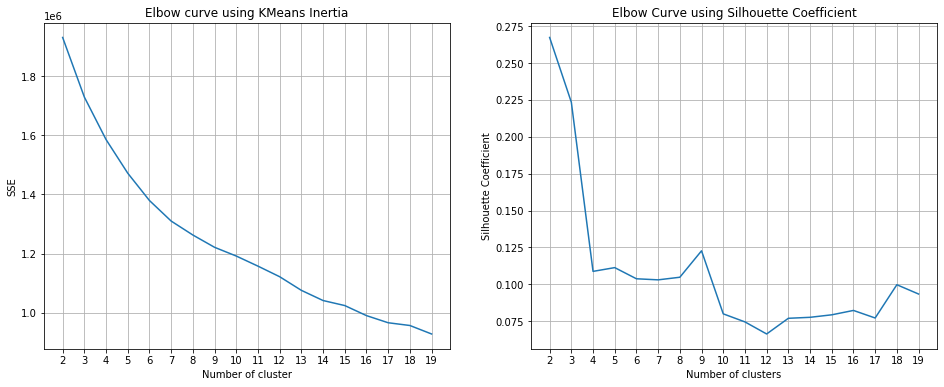

In [56]:
### Looking to determine how many clusters to use 
# (I would choose 5 by default but investigating if there are other pattterns)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

"""
Excluding categorical features as well as the response variable AND player physical characteristics
(NOTE:maybe I should use pd.get_dummies on obj. columns before clustering?)
"""
x_cols_matrix = df2.drop(columns=['Player','TEAM', 'College', 'Country', 'PIE_2018', 'Height','Weight','AGE','Draft_Number'],axis=1)

k_range = range(2,20)


distorsions = []

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=33)
    kmeans.fit(x_cols_matrix)
    distorsions.append(kmeans.inertia_)

plt.figure(figsize=(16,6))    
    
plt.subplot(1,2,1)    
plt.plot(k_range, distorsions)
plt.grid(True)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('Elbow curve using KMeans Inertia')
plt.xticks(k_range)


scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=33)
    km_ss.fit(x_cols_matrix)
    scores.append(silhouette_score(x_cols_matrix, km_ss.labels_))

# plot the results
plt.subplot(1,2,2)    
plt.plot(k_range, scores)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Elbow Curve using Silhouette Coefficient')
plt.xticks(k_range)


plt.show()

3    190
1    109
0     91
4      8
2      1
Name: cluster_5, dtype: int64


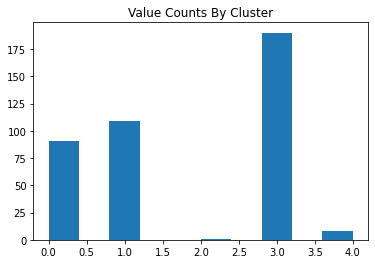

In [57]:
cluster = KMeans(n_clusters=5, random_state=1)

x_cols_matrix_labeled = x_cols_matrix.copy()
x_cols_matrix_labeled['cluster_5'] = cluster.fit_predict(x_cols_matrix_labeled)

print(x_cols_matrix_labeled.cluster_5.value_counts())
plt.hist(x_cols_matrix_labeled.cluster_5)
plt.title('Value Counts By Cluster')

plt.show()

4    128
2     78
8     60
5     44
1     30
6     25
3     14
0     11
7      8
9      1
Name: cluster_10, dtype: int64


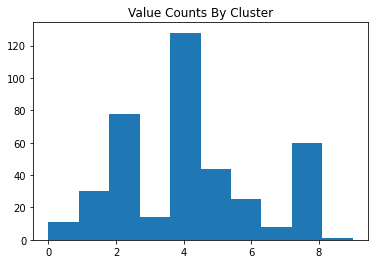

In [58]:
cluster = KMeans(n_clusters=10)

x_cols_matrix_labeled['cluster_10'] = cluster.fit_predict(x_cols_matrix_labeled)
print(x_cols_matrix_labeled.cluster_10.value_counts())

plt.hist(x_cols_matrix_labeled.cluster_10)
plt.title('Value Counts By Cluster')

plt.show()

0     63
1     59
8     55
13    44
2     42
10    40
12    31
6     21
3     14
7     12
11    10
4      6
9      1
5      1
Name: cluster_14, dtype: int64


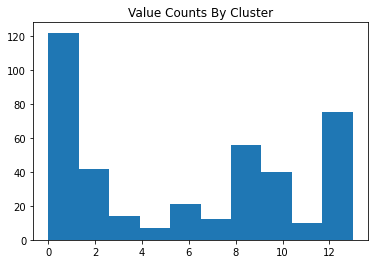

In [59]:
cluster = KMeans(n_clusters=14)

x_cols_matrix_labeled['cluster_14'] = cluster.fit_predict(x_cols_matrix_labeled)
print(x_cols_matrix_labeled.cluster_14.value_counts())

plt.hist(x_cols_matrix_labeled.cluster_14)
plt.title('Value Counts By Cluster')

plt.show()

In [60]:
x_cols_matrix_labeled.insert(0, 'Player', df2.Player)

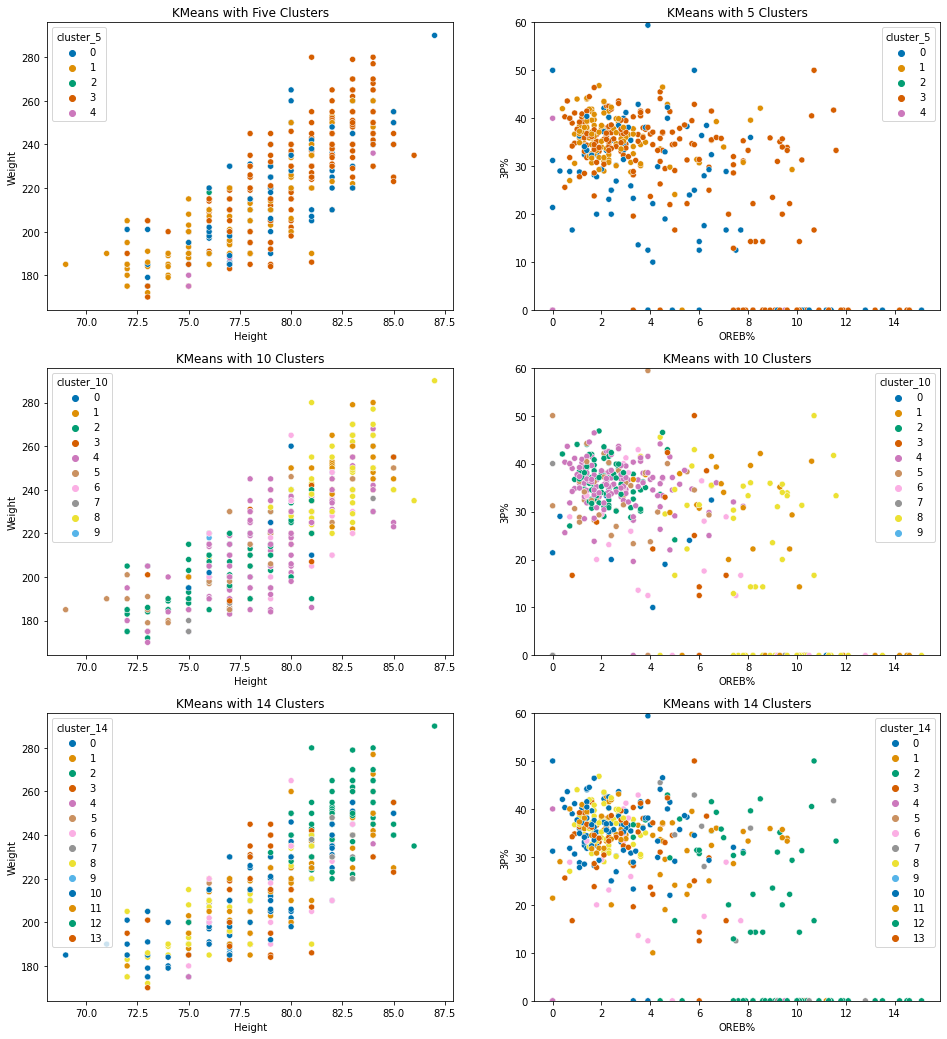

In [61]:
plt.figure(figsize=(16,18))

plt.subplot(3, 2, 1)
sns.scatterplot(x=df.Height, y = df.Weight, hue =x_cols_matrix_labeled.cluster_5, palette="colorblind")
plt.title('KMeans with Five Clusters')

plt.subplot(3, 2, 3)
sns.scatterplot(x=df.Height, y = df.Weight, hue =x_cols_matrix_labeled.cluster_10, palette="colorblind")
plt.title('KMeans with 10 Clusters')

plt.subplot(3, 2, 5)
sns.scatterplot(x=df.Height, y = df.Weight, hue =x_cols_matrix_labeled.cluster_14, palette="colorblind")
plt.title('KMeans with 14 Clusters')

plt.subplot(3, 2, 2)
sns.scatterplot(x=x_cols_matrix_labeled['OREB%'], y = x_cols_matrix_labeled['3P%'], hue =x_cols_matrix_labeled.cluster_5, palette="colorblind")
plt.title('KMeans with 5 Clusters')
plt.ylim((0,60))

plt.subplot(3, 2, 4)
sns.scatterplot(x=x_cols_matrix_labeled['OREB%'], y = x_cols_matrix_labeled['3P%'], hue =x_cols_matrix_labeled.cluster_10, palette="colorblind")
plt.title('KMeans with 10 Clusters')
plt.ylim((0,60))

plt.subplot(3, 2, 6)
sns.scatterplot(x=x_cols_matrix_labeled['OREB%'], y = x_cols_matrix_labeled['3P%'], hue =x_cols_matrix_labeled.cluster_14, palette="colorblind")
plt.title('KMeans with 14 Clusters')
plt.ylim((0,60))

plt.show()


#### I am mildly colorblind and cannot readily differeniate all the clusters, but I can tell there are some slight  patterns here. I will keep all variables to test model performance in the next notebook.

In [63]:
# Appending these two new columns back into our main dataframe before exporting.

df2['cluster_five']= x_cols_matrix_labeled.cluster_5
df2['cluster_ten'] = x_cols_matrix_labeled.cluster_10
df2['cluster_fourteen']= x_cols_matrix_labeled.cluster_14

In [64]:
df2.head()

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,cluster_five,cluster_ten,cluster_fourteen
0,Aaron Gordon,ORL,Arizona,USA,11.3,10.9,22,32.9,58,19,39,17.6,6.5,33.6,2.7,69.8,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,81.0,220,4,7.0,93.0,85.2,23.9,33.5,0.7,61.1,6.0,40.2,32.5,0.2,2.7,6.6,1.9,1.4,42.9,57.1,0.07,4.7,1.8,3.2,66.7,0.2,20.0,0.4,35.7,0.5,29.8,14.4,63.2,2.3,37.1,2.2,42.4,2.5,42.4,3.7,40.3,3.8,33.9,108.3,-2.0,11.1,4.4,19.1,50.0,53.0,23.8,100.43,1,2,1
1,Abdel Nader,BOS,Iowa State,Egypt,3.3,6.6,24,10.9,48,33,15,3.0,1.0,35.4,0.5,59.0,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,78.0,230,58,17.5,82.5,92.0,12.0,29.6,0.2,62.3,7.0,8.7,9.1,0.1,0.7,8.6,0.3,0.7,38.9,61.1,0.00,1.5,1.3,0.4,40.4,0.1,20.0,0.0,20.0,0.0,0.0,4.2,59.8,0.5,26.8,0.6,41.9,0.8,42.2,1.3,43.1,1.7,39.8,107.3,-10.3,7.8,2.4,11.1,41.3,43.9,16.2,100.46,0,6,7
2,Al Horford,BOS,Florida,Dominican Rep...,13.4,13.4,32,31.6,72,47,25,12.9,5.1,42.9,1.3,78.3,1.8,0.6,1.1,1.9,32.0,15,0,4.8,82.0,245,3,7.3,92.7,90.4,33.3,33.9,0.6,60.6,6.4,48.9,42.9,0.3,5.1,10.4,6.5,1.3,52.6,47.4,0.00,8.8,3.5,1.9,67.5,0.8,40.7,0.5,37.3,0.4,49.2,11.5,59.8,1.8,33.9,1.8,36.0,2.4,35.7,3.4,41.2,3.5,29.8,101.6,7.3,22.5,4.7,17.8,55.3,57.5,18.3,97.23,1,2,12
3,Al-Farouq Aminu,POR,Wake Forest,USA,9.0,9.7,27,30.0,69,40,29,9.3,3.3,36.9,0.9,73.8,1.1,1.1,0.6,2.0,24.3,9,0,3.2,81.0,220,8,16.2,83.8,88.5,40.5,29.1,0.7,62.4,5.9,25.0,19.1,0.2,1.6,6.3,3.5,2.2,42.4,57.6,0.00,5.7,3.0,1.2,58.9,0.2,24.5,0.0,16.7,0.0,11.1,10.3,54.1,2.3,43.3,2.1,38.5,2.6,43.6,3.5,39.5,3.4,36.8,104.4,5.2,5.6,4.5,19.8,50.3,52.2,14.5,98.47,3,4,13
4,Alan Williams,PHX,California-Santa Barbara,USA,8.9,27.4,25,14.1,5,1,4,4.0,1.4,0.0,1.2,66.7,1.4,1.0,0.2,2.6,13.9,0,0,0.2,80.0,265,61,11.8,88.2,87.5,37.5,27.3,0.0,45.8,4.0,17.6,15.6,0.0,2.0,11.4,4.0,1.0,0.0,100.0,0.00,1.2,1.0,0.8,57.1,0.6,37.5,0.0,0.0,0.0,0.0,4.2,44.7,1.0,45.5,0.8,50.0,0.8,36.4,1.2,54.5,1.4,26.9,90.8,0.1,19.5,3.9,26.0,38.9,45.5,18.4,97.25,0,6,6


## EDA Complete, Exporting Pruned Dataframe for Next Step: Pre-Processing

In [66]:
df2.to_csv('data/post_EDA_data.csv', index = False)

Text(0.5, 1.0, 'PDF of PIE 2018')

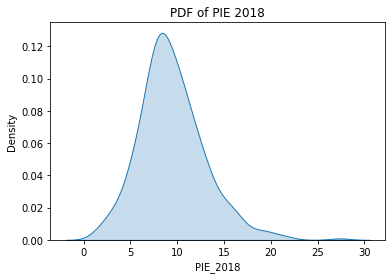

In [69]:
sns.kdeplot(data=df.iloc[:,5], shade=True)
plt.title('PDF of PIE 2018')

Text(0.5, 1.0, 'Boxplot of PIE 2018')

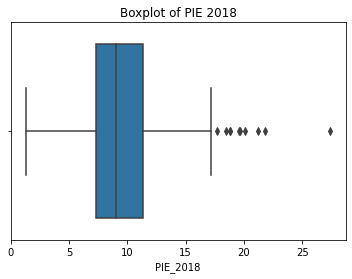

In [74]:
sns.boxplot(x=df.iloc[:,5])
plt.title('Boxplot of PIE 2018')

In [75]:
df.PIE_2018.describe()

count    399.000000
mean       9.444862
std        3.549127
min        1.300000
25%        7.300000
50%        9.000000
75%       11.300000
max       27.400000
Name: PIE_2018, dtype: float64